# 기본 선형회귀

In [80]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
import mglearn

/home/jmhwang/miniconda3/envs/adp/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/jmhwang/miniconda3/envs/adp/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [5]:
X, y = mglearn.datasets.make_wave(n_samples=60)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
lr = LinearRegression().fit(X_train, y_train)

In [8]:
# 가중치 또느 계수
lr.coef_

array([0.39390555])

In [10]:
# 편향 또는 절편
lr.intercept_

-0.031804343026759746

## $R^2$(결정계수)

score에 사용

In [11]:
# R^2: 모델의 성능
lr.score(X_test, y_test)

0.65933685968637

In [12]:
lr.score(X_train, y_train)

0.6700890315075756

In [15]:
# 보스턴 집 값
X, y = mglearn.datasets.load_extended_boston()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [17]:
lr = LinearRegression().fit(X_train, y_train)

In [86]:
# overfitting - 훈련데이터에는 성능이 좋으나 테스트 데이터에는 성능이 안좋음
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))
print(np.sum(lr.coef_!=0))

0.9520519609032728
0.6074721959665987
104


## Ridge - L2 constraint or L2 regularization

- L2 규제를 이용한 선형회귀모델
- 가중치(coef_)의 절대값을 최대한 작게 만듬. w의 모든 원소가 0에 가깝게 되길 원함
- 직관적으로 생각했을 때, 모든 특성이 출력에 주는 영향을 최소한으로 만든다라는 의미(기울기를 작게 만듬)
- 위와 같이 모델에 주는 제약을 규제라고 함
- __규제__: 모델이 과대적합이 되지 않도록 모델을 강제로 제한한다는 의미

---

`alpha`: ridge 회귀에서 모델의 복잡도 조절. __클수록 복잡도를 낮춤.__ default=1.0

- 모델의 복잡도가 낮으면 훈련 세트에 대해서는 나쁜 성능이지만 더 일반화된 모델이 됨
- 높은 alpha는 제약이 많은 모델

In [40]:
from sklearn.linear_model import Ridge

In [82]:
# alpha=1.0 (default)
ridge = Ridge().fit(X_train, y_train)
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))
print(np.sum(ridge.coef_!=0))

0.885796658517094
0.7527683481744751
104


In [83]:
# alpha=10
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print(ridge10.score(X_train, y_train))
print(ridge10.score(X_test, y_test))
print(np.sum(ridge10.coef_!=0))

0.7882787115369614
0.6359411489177309
104


In [84]:
# alpha=0.1
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print(ridge01.score(X_train, y_train))
print(ridge01.score(X_test, y_test))
print(np.sum(ridge01.coef_!=0))

0.9282273685001989
0.7722067936479815
104


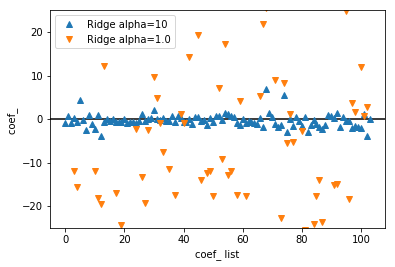

In [65]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(lr.coef_, 'v', label="Ridge alpha=1.0")

xlims = plt.xlim()
plt.xlabel("coef_ list")
plt.ylabel("coef_ ")
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

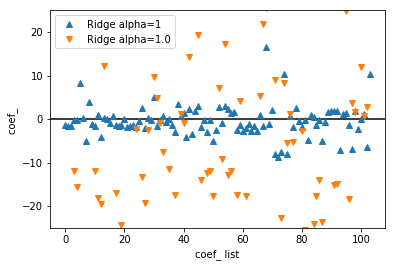

In [66]:
plt.plot(ridge.coef_, '^', label="Ridge alpha=1")
plt.plot(lr.coef_, 'v', label="Ridge alpha=1.0")

xlims = plt.xlim()
plt.xlabel("coef_ list")
plt.ylabel("coef_ ")
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

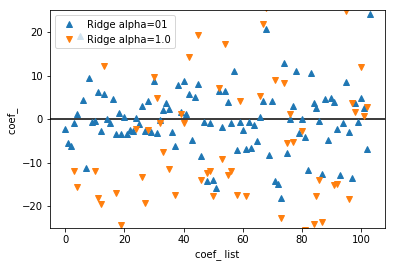

In [67]:
plt.plot(ridge01.coef_, '^', label="Ridge alpha=01")
plt.plot(lr.coef_, 'v', label="Ridge alpha=1.0")

xlims = plt.xlim()
plt.xlabel("coef_ list")
plt.ylabel("coef_ ")
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

## constraint 효과를 이해하는 또 다른 방법
alpha 고정, 훈련 데이터 크기를 변화

- ridge는 규제가 적용되므로 전체적으로 선형회귀의 훈련 데이터 점수보다 낮음
- 그러나 테스트 데이터에서는 ridge 점수가 더 높음
- 두 모델 모두 데이터가 많아지면 점수가 높아짐

- __한가지 흥미로운점__: 데이터 양이 증가할수록 선형회귀의 훈련 데이터 성능이 낮아짐 -> 데이터가 많아질 수록 모델이 과대적합하기 어려워지기 때문

데이터를 충분히 주면 규제 항을 덜 중요해져서 리지 회귀와 선형 회귀의 성능이 같아질 것이라는 점을 알 수 있음

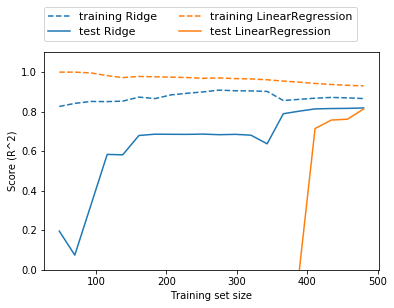

In [68]:
mglearn.plots.plot_ridge_n_samples()

## Lasso - L1 constraint
- coef_를 0에 가깝게 만들도록 할 때, 그 방식을 L1을 쓰면 Lasso

In [73]:
from sklearn.linear_model import Lasso

In [75]:
lasso = Lasso().fit(X_train, y_train)

In [87]:
# 모델이 훈련 데이터와 테스트 데이터 모두에서 성능이 좋지 않음 - 과소적합
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))
print("사용한 특성 개수:", np.sum(lass.coef_!=0))

0.29323768991114607
0.20937503255272294
사용한 특성 개수: 4


---

- `alpha`: Lass 회귀에서 모델의 복잡도 조절. __클수록 복잡도를 낮춤(일반화가 잘됨)__. __작을수록 복잡도가 높음__ default=1.0
- `max_iter`: 반복 횟수. __좌표하강법__ 방식을 반복적으로 사용하여 최적값을 찾아가게 됨. __alpha가 작을 경우 max_iter를 넣어줘야함__

In [101]:
# Ridge 보다 사용한 계수가 적어서 모델 분석이 조금 쉬움
# alpha가 너무 작으면 모델이 과대적합하기 쉬우므로 LinearRegression의 결과와 비슷해짐

lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print(lasso001.score(X_train, y_train))
print(lasso001.score(X_test, y_test))
print("반복 횟수 {}회 만에 최적의 coef_ 찾음".format(lasso001.n_iter_))
print("사용한 특성 개수:", np.sum(lasso001.coef_!=0))

0.8962226511086497
0.7656571174549982
반복 횟수 1886회 만에 최적의 coef_ 찾음
사용한 특성 개수: 33


In [103]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

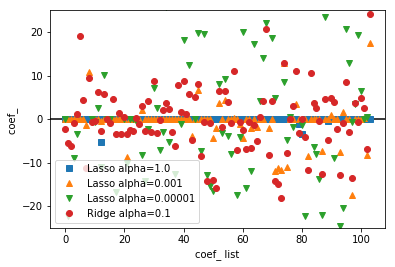

In [107]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1.0")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.001")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.00001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")

xlims = plt.xlim()
plt.xlabel("coef_ list")
plt.ylabel("coef_ ")
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

## 보통 Ridge 회귀를 선호하는데, 다만

- 특성이 많고 그중 일부분만 중요하면 Lasso
- 분석하기 쉬운 모델을 원한다면 Lasso (입력 특성 중 일부만 사용하므로 Lasso로 쉽게 해석할 수 있음)

---

## ElsaticNet: L1 & L2 패널티를 결합한 선형회귀 모델

실제로 최상의 성능을 내지만 L1 규제와 L2 규제를 위한 매개변수 두 개를 조정해야함

---

# 선형분류모델

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

- LinearSVC는 squared hinge loss 함수를 이용하므로 반복회수가 추가되어야함. default는 1000
- LogisticRegression역시 max_iter가 있어야하고 default는 100임
- __두 모델은 기본적으로 L2 규제를 사용함__

In [109]:
X, y = mglearn.datasets.make_forge()

/home/jmhwang/miniconda3/envs/adp/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


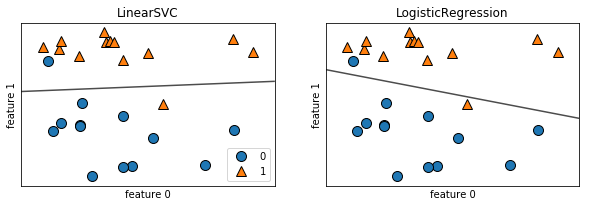

In [114]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))


for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.4, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend()

---

`C`: 규제의 강도를 결정하는 매개변수. 

__`C`가 클수록 -> 규제감소 -> 계수를 0보다 덜 가까워지게 만듬 -> 데이터 각각을 정확하게 분류하려고 노력 -> 복잡도 증가 -> 일반화된 모델이 아님 (과적합)__

__선형회귀와 비교__

`alpha`가 클수록 -> 규제증가 -> 계수를 0에 가까워지게 만듬 -> 복잡도 감소 -> 일반화된 모델

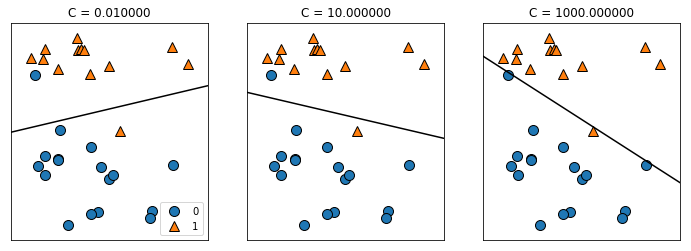

In [116]:
mglearn.plots.plot_linear_svc_regularization()

In [117]:
from sklearn.datasets import load_breast_cancer

In [118]:
cancer = load_breast_cancer()

In [122]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [148]:
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)

print(logreg.score(X_train, y_train))
print(logreg.score(X_test, y_test))

0.9577464788732394
0.958041958041958


## 규제를 약하게 -> `C`를 크게 설정

In [135]:
logreg100 = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train)

# C를 증가시키니 훈련 세트 정확도가 높아지고, 테스트 세트도 조금 높아짐 -> 복잡도가 높은 모델일수록 성능이 좋음
print(logreg100.score(X_train, y_train))
print(logreg100.score(X_test, y_test))

0.9812206572769953
0.965034965034965


/home/jmhwang/miniconda3/envs/adp/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## 규제를 강하게 -> `C`를 작게 설정

In [136]:
logreg001 = LogisticRegression(C=0.01, max_iter=5000).fit(X_train, y_train)

print(logreg001.score(X_train, y_train))
print(logreg001.score(X_test, y_test))

0.9530516431924883
0.951048951048951


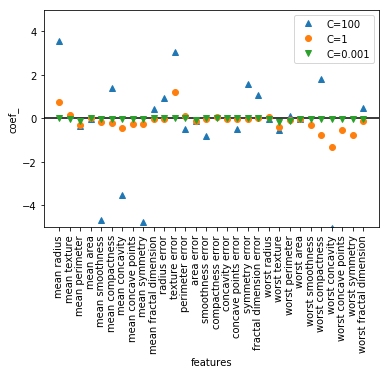

In [152]:
plt.plot(logreg100.coef_.T, '^', label='C=100')
plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg001.coef_.T, 'v', label='C=0.001')

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)

xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel('features')
plt.ylabel("coef_")
plt.legend()

## l1을 사용했을 때, C에 따른 로지스틱 성능
default `penalty='l2'`

C=0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도: 0.92

C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.96

C=100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.98



/home/jmhwang/miniconda3/envs/adp/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


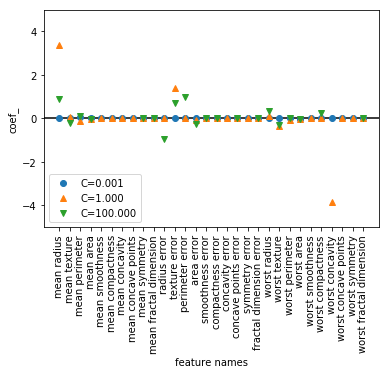

In [162]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty='l1', max_iter=100).fit(X_train, y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    print()
    
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()

plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("feature names")
plt.ylabel("coef_")

plt.ylim(-5, 5)
plt.legend(loc=3)

# 다중클래스 분류용 선형모델

In [164]:
from sklearn.datasets import make_blobs

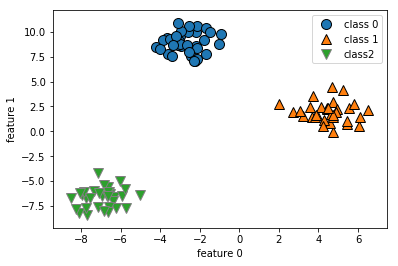

In [168]:
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(['class 0', 'class 1', 'class2'])

In [170]:
linear_svm = LinearSVC().fit(X, y)
print(linear_svm.coef_.shape)
print(linear_svm.intercept_.shape)

(3, 2)
(3,)


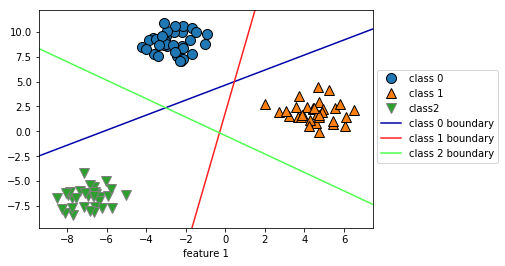

In [179]:
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    ##### y hat을 구할 때 왜 음수를 붙이는지 모르겠다..###########
    
    
# plt.ylim(-10, 15)
# plt.ylim(-10, 8)
plt.xlabel("feature 0")
plt.xlabel("feature 1")
plt.legend(['class 0', 'class 1', 'class2', 'class 0 boundary', 'class 1 boundary', 'class 2 boundary'],
          loc=(1.01, 0.3))

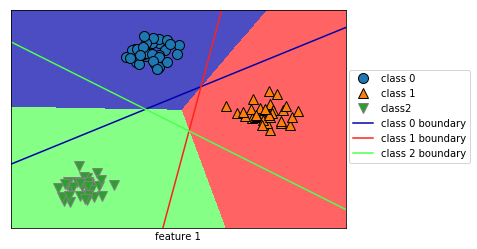

In [180]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=0.7)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    
# plt.ylim(-10, 15)
# plt.ylim(-10, 8)
plt.xlabel("feature 0")
plt.xlabel("feature 1")
plt.legend(['class 0', 'class 1', 'class2', 'class 0 boundary', 'class 1 boundary', 'class 2 boundary'],
          loc=(1.01, 0.3))